In [33]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
from pathlib import Path
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import geopandas as gpd



In [2]:
#import data files
cleaned_data_path = Path("cleaned_nyc_copy.csv")

In [3]:
#Read nyc cleaned crime data 
nyc_clean_df = pd.read_csv(cleaned_data_path)
nyc_clean_df.head()

,offence level,borough,suspect age group,suspect race,suspect sex,Latitude,Longitude,Lat_Lon,victim age group,victim race,victim sex,pop
0,VIOLATION,BROOKLYN,45-64,WHITE,M,40.621708,-74.000593,"(40.621708, -74.000593)",25-44,WHITE,F,2590516
1,MISDEMEANOR,BROOKLYN,Unknown,Unknown,Unknown,40.618867,-74.021057,"(40.618867, -74.021057)",25-44,WHITE,M,2590516
2,VIOLATION,BROOKLYN,25-44,BLACK,M,40.705035,-73.939373,"(40.705035, -73.939373)",45-64,BLACK,F,2590516
3,MISDEMEANOR,BROOKLYN,25-44,BLACK,Unknown,40.700294,-73.990838,"(40.700294, -73.990838)",25-44,BLACK,F,2590516
4,MISDEMEANOR,BROOKLYN,45-64,WHITE,M,40.622093,-73.998140,"(40.622093, -73.99814)",Unknown,UNKNOWN,Unknown,2590516


In [ ]:
#Question: or each borough in NYC, what is the number of crimes belonging to each   level of offense (violation, misdemeanour and felony) (LAW_CAT_CD)
#    - summary table (count, percentage of total)
#    - map, option for bar chart 


In [4]:
#Filter dataset to find counts of crimes (broken down by offence level) for each borough
borough_breakdown = nyc_clean_df.groupby(["borough"])["offence level"].value_counts()
borough_breakdown


borough        offence level
BRONX          MISDEMEANOR      53770
               FELONY           37321
               VIOLATION        18940
BROOKLYN       MISDEMEANOR      71012
               FELONY           48335
               VIOLATION        25019
MANHATTAN      MISDEMEANOR      70058
               FELONY           44149
               VIOLATION        16765
QUEENS         MISDEMEANOR      57231
               FELONY           37357
               VIOLATION        17660
STATEN ISLAND  MISDEMEANOR      11637
               FELONY            5734
               VIOLATION         4690
Name: count, dtype: int64

In [6]:
#Create and display dataframe 
borough_summary = pd.DataFrame({"Crime Counts": borough_breakdown})
borough_summary

Crime Counts
borough       offence level              
BRONX         MISDEMEANOR           53770
              FELONY                37321
              VIOLATION             18940
BROOKLYN      MISDEMEANOR           71012
              FELONY                48335
              VIOLATION             25019
MANHATTAN     MISDEMEANOR           70058
              FELONY                44149
              VIOLATION             16765
QUEENS        MISDEMEANOR           57231
              FELONY                37357
              VIOLATION             17660
STATEN ISLAND MISDEMEANOR           11637
              FELONY                 5734
              VIOLATION              4690

In [9]:
#filter data set to show only misdemeanor
#mouse_data = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == "l509"), :]

borough_misdemeanor = nyc_clean_df.loc[(nyc_clean_df["offence level"] == "MISDEMEANOR"), :]
borough_misdemeanor

,offence level,borough,suspect age group,suspect race,suspect sex,Latitude,Longitude,Lat_Lon,victim age group,victim race,victim sex,pop
1,MISDEMEANOR,BROOKLYN,Unknown,Unknown,Unknown,40.618867,-74.021057,"(40.618867, -74.021057)",25-44,WHITE,M,2590516
3,MISDEMEANOR,BROOKLYN,25-44,BLACK,Unknown,40.700294,-73.990838,"(40.700294, -73.990838)",25-44,BLACK,F,2590516
4,MISDEMEANOR,BROOKLYN,45-64,WHITE,M,40.622093,-73.998140,"(40.622093, -73.99814)",Unknown,UNKNOWN,Unknown,2590516
7,MISDEMEANOR,BROOKLYN,Unknown,Unknown,Unknown,40.676634,-73.959434,"(40.67663392, -73.95943441)",25-44,BLACK,M,2590516
9,MISDEMEANOR,BROOKLYN,25-44,ASIAN / PACIFIC ISLANDER,M,40.682923,-73.964221,"(40.682923, -73.964221)",25-44,BLACK HISPANIC,M,2590516
...,...,...,...,...,...,...,...,...,...,...,...,...
519667,MISDEMEANOR,MANHATTAN,25-44,BLACK,M,40.754841,-73.984119,"(40.75484094, -73.98411854)",25-44,WHITE,F,1596273
519671,MISDEMEANOR,MANHATTAN,25-44,BLACK,M,40.789463,-73.947634,"(40.7894632995555, -73.9476340039424)",<18,BLACK,M,1596273
519674,MISDEMEANOR,MANHATTAN,Unknown,Unknown,Unknown,40.713135,-74.004058,"(40.71313543, -74.00405805)",Unknown,UNKNOWN,Unknown,1596273
519675,MISDEMEANOR,MANHATTAN,25-44,WHITE HISPANIC,M,40.710220,-74.007744,"(40.71022031, -74.00774423)",25-44,WHITE HISPANIC,M,1596273


In [10]:
#Find counts of misdemeanor in each borough
group_bor_mis = borough_misdemeanor.groupby(["borough"])["offence level"].count()
group_bor_mis 

borough
BRONX            53770
BROOKLYN         71012
MANHATTAN        70058
QUEENS           57231
STATEN ISLAND    11637
Name: offence level, dtype: int64

In [11]:
#filter data set to show only Felony
borough_felony = nyc_clean_df.loc[(nyc_clean_df["offence level"] == "FELONY"), :]
borough_felony

,offence level,borough,suspect age group,suspect race,suspect sex,Latitude,Longitude,Lat_Lon,victim age group,victim race,victim sex,pop
6,FELONY,BROOKLYN,Unknown,Unknown,Unknown,40.640287,-73.951356,"(40.640287, -73.951356)",25-44,BLACK,M,2590516
8,FELONY,BROOKLYN,25-44,BLACK,M,40.630600,-73.973705,"(40.6305998504358, -73.9737053160275)",<18,BLACK,F,2590516
18,FELONY,BROOKLYN,Unknown,Unknown,Unknown,40.670096,-73.907969,"(40.6700964, -73.90796854)",25-44,BLACK,F,2590516
19,FELONY,BROOKLYN,18-24,BLACK,M,40.645813,-73.962388,"(40.645813, -73.962388)",Unknown,UNKNOWN,Unknown,2590516
25,FELONY,BROOKLYN,Unknown,WHITE HISPANIC,Unknown,40.677413,-73.930318,"(40.67741321, -73.93031809)",45-64,BLACK,M,2590516
...,...,...,...,...,...,...,...,...,...,...,...,...
519668,FELONY,MANHATTAN,Unknown,Unknown,Unknown,40.757308,-73.987878,"(40.757308, -73.987878)",18-24,WHITE,F,1596273
519670,FELONY,MANHATTAN,Unknown,ASIAN / PACIFIC ISLANDER,M,40.753143,-74.007406,"(40.7531428, -74.00740634)",25-44,WHITE,M,1596273
519672,FELONY,MANHATTAN,Unknown,Unknown,Unknown,40.826093,-73.950695,"(40.826093, -73.950695)",Unknown,UNKNOWN,Unknown,1596273
519673,FELONY,MANHATTAN,Unknown,WHITE HISPANIC,M,40.749404,-73.991784,"(40.749404, -73.991784)",45-64,UNKNOWN,M,1596273


In [12]:
#Find counts of felony in each borough
group_bor_fel = borough_felony.groupby(["borough"])["offence level"].count()
group_bor_fel 

borough
BRONX            37321
BROOKLYN         48335
MANHATTAN        44149
QUEENS           37357
STATEN ISLAND     5734
Name: offence level, dtype: int64

In [13]:
#filter data set to show only violation
borough_violation = nyc_clean_df.loc[(nyc_clean_df["offence level"] == "VIOLATION"), :]
borough_violation

,offence level,borough,suspect age group,suspect race,suspect sex,Latitude,Longitude,Lat_Lon,victim age group,victim race,victim sex,pop
0,VIOLATION,BROOKLYN,45-64,WHITE,M,40.621708,-74.000593,"(40.621708, -74.000593)",25-44,WHITE,F,2590516
2,VIOLATION,BROOKLYN,25-44,BLACK,M,40.705035,-73.939373,"(40.705035, -73.939373)",45-64,BLACK,F,2590516
5,VIOLATION,BROOKLYN,45-64,WHITE,M,40.621708,-74.000593,"(40.621708, -74.000593)",25-44,WHITE,F,2590516
10,VIOLATION,BROOKLYN,Unknown,Unknown,Unknown,40.625054,-73.921715,"(40.625054, -73.921715)",25-44,BLACK,F,2590516
11,VIOLATION,BROOKLYN,Unknown,Unknown,Unknown,40.642393,-73.943843,"(40.642393, -73.943843)",45-64,BLACK,F,2590516
...,...,...,...,...,...,...,...,...,...,...,...,...
519650,VIOLATION,MANHATTAN,Unknown,Unknown,Unknown,40.787560,-73.943129,"(40.78756, -73.943129)",45-64,BLACK HISPANIC,F,1596273
519657,VIOLATION,MANHATTAN,Unknown,Unknown,M,40.757232,-73.968273,"(40.757232, -73.968273)",Unknown,UNKNOWN,F,1596273
519660,VIOLATION,MANHATTAN,Unknown,WHITE HISPANIC,F,40.740236,-73.976783,"(40.740236, -73.976783)",65+,WHITE HISPANIC,F,1596273
519666,VIOLATION,MANHATTAN,Unknown,BLACK,Unknown,40.807094,-73.943873,"(40.807094, -73.943873)",45-64,BLACK,M,1596273


In [24]:
#Find counts of violation in each borough
group_bor_vio = borough_violation.groupby(["borough"])["offence level"].count()
group_bor_vio 

borough
BRONX            18940
BROOKLYN         25019
MANHATTAN        16765
QUEENS           17660
STATEN ISLAND     4690
Name: offence level, dtype: int64

In [26]:
#Create and display dataframe 
borough_offence_summary = pd.DataFrame({"Misdemeanor Count": group_bor_mis, "Felony Count": group_bor_fel, "Violation Count": group_bor_vio})
borough_offence_summary

,Misdemeanor Count,Felony Count,Violation Count
borough,,,
BRONX,53770,37321,18940
BROOKLYN,71012,48335,25019
MANHATTAN,70058,44149,16765
QUEENS,57231,37357,17660
STATEN ISLAND,11637,5734,4690


In [28]:
#Add total column to dataframe
total_count = borough_offence_summary["Misdemeanor Count"]+borough_offence_summary["Felony Count"]+borough_offence_summary["Violation Count"] 
borough_offence_summary["Total Count"] = total_count
borough_offence_summary

,Misdemeanor Count,Felony Count,Violation Count,Total Count
borough,,,,
BRONX,53770,37321,18940,110031
BROOKLYN,71012,48335,25019,144366
MANHATTAN,70058,44149,16765,130972
QUEENS,57231,37357,17660,112248
STATEN ISLAND,11637,5734,4690,22061


In [29]:
#Sort dataframe from highest to lowest
sorted_summary = borough_offence_summary.sort_values("Total Count", ascending=False)
sorted_summary


,Misdemeanor Count,Felony Count,Violation Count,Total Count
borough,,,,
BROOKLYN,71012,48335,25019,144366
MANHATTAN,70058,44149,16765,130972
QUEENS,57231,37357,17660,112248
BRONX,53770,37321,18940,110031
STATEN ISLAND,11637,5734,4690,22061


KeyError: 'borough'

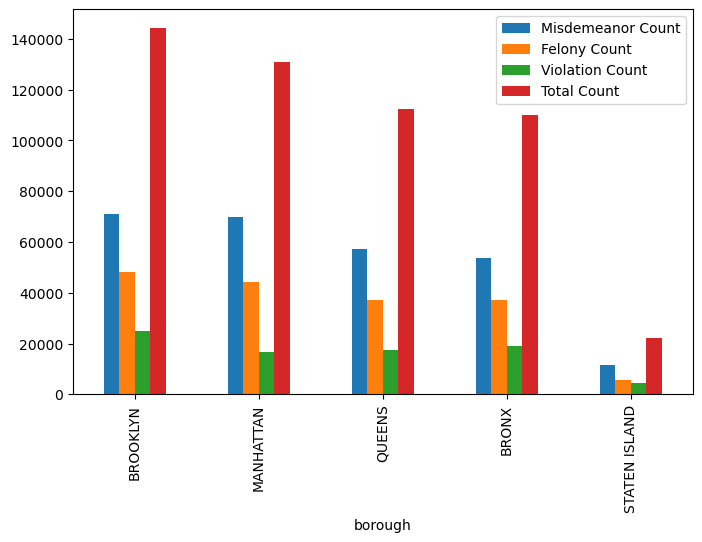

In [31]:
# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = sorted_summary.plot(kind="bar", figsize=(8,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(sorted_summary["borough"], rotation=45)

plt.show()
plt.tight_layout()

In [34]:
#map
coordinates = {
    "latitude": [40.650002, 40.776676, 40.742054, 40.837048, 40.579021],
    "longitude": [-73.949997, -73.971321, -73.769417, -73.865433, -74.151535],
    "borough": ["Brooklyn", "Manhattan", "Queens", "Bronx", "Staten Island"],
    "Crime Count": [144366, 130972, 112248, 110031, 22061]
}




In [35]:
#create dataframe
coordinates_df = pd.DataFrame(coordinates)

In [38]:
#plot map 
map_plot = coordinates_df.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    size = "Crime Count",
    scale = 0.2,
    color = "borough"
)

map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (borough,Crime Count)